In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from datetime import datetime
import joblib
import pickle
import plotly
import plotly.express as px

In [2]:
df=pd.read_excel(r'E:\Data Analytics\Pyhton\Python Datas\Superstore.xlsx')
df

C:\Users\KUMAR COMPUTERS\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2016-110422,2016-01-21,2016-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
#  for border Line

#     xaxis=dict(showline=True, linewidth=2, linecolor='black'),
#     yaxis=dict(showline=True, linewidth=2, linecolor='black'),
# shapes=[dict( type="rect",xref="paper", yref="paper",x0=0, y0=0, x1=1, y1=1,line=dict(color="black", width=2))]


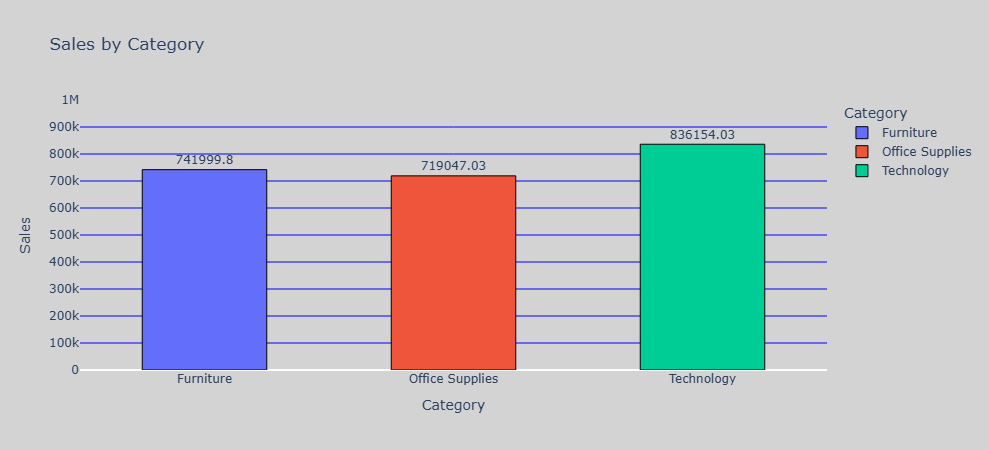

In [63]:
# Category wise total sales 
ds=df.groupby('Category')['Sales'].sum().reset_index().round(2)
fig=px.bar(ds,x='Category',y='Sales',title='Sales by Category',color='Category',text='Sales')
fig.update_layout(height=450,width=800,paper_bgcolor='lightgray',plot_bgcolor='lightgray',yaxis=dict(gridcolor='blue'))

fig.update_traces(width=0.5,textposition='outside',marker_line_color='black',marker_line_width=1)
fig.update_yaxes(range=[0,1000000],dtick=100000,tickformat='~s')
fig.show()

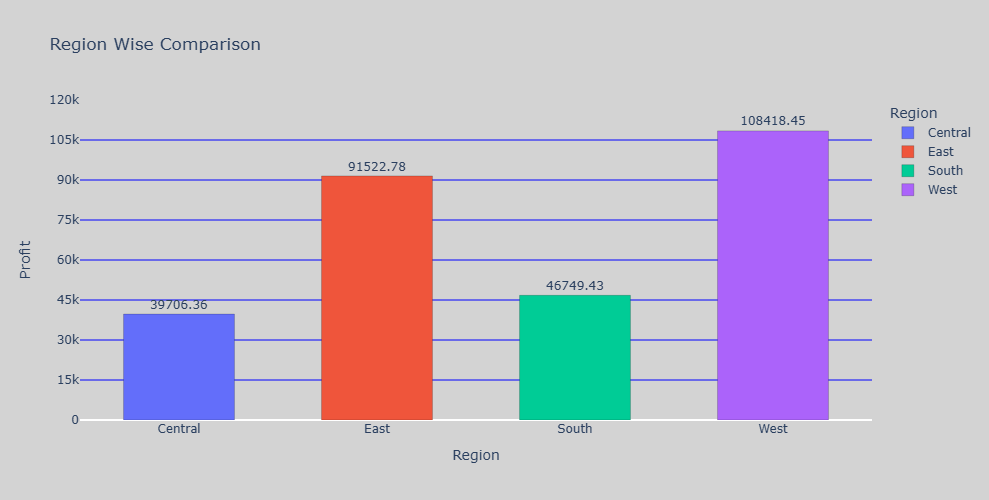

In [71]:
# 2. Region-wise profit comparison
region=df.groupby('Region')['Profit'].sum().reset_index().round(2)
fig=px.bar(region,x='Region',y='Profit',title='Region Wise Comparison',color='Region',text='Profit')
fig.update_layout(height=500,width=900,paper_bgcolor='lightgray',plot_bgcolor='lightgray',yaxis=dict(gridcolor='blue'))
fig.update_traces(width=0.56,textposition='outside',marker_line_color='black',marker_line_width=0.2)
fig.update_yaxes(range=[0,120000],dtick=15000)
fig.show()

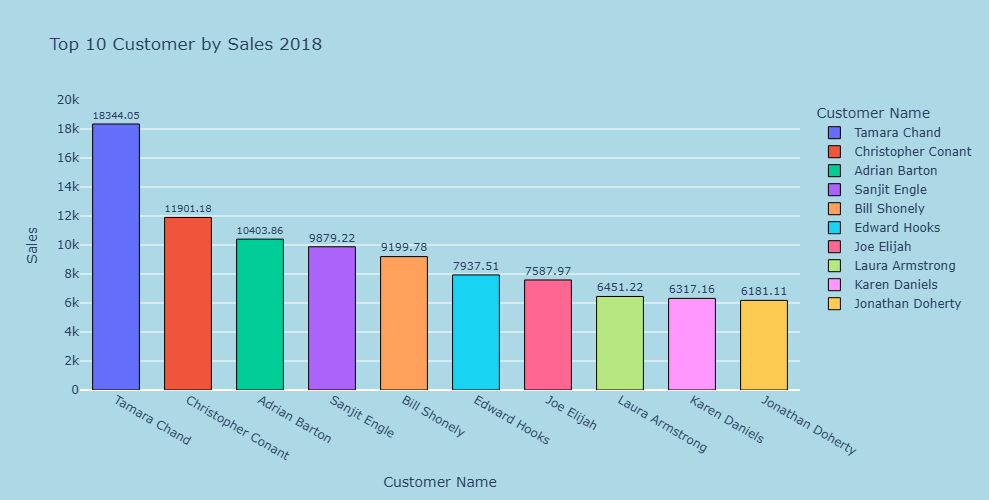

In [4]:
# Top 10 Customer by sales 2018
year=df[df['Order Date'].dt.year==2018]
top=year.groupby('Customer Name')['Sales'].sum().reset_index().nlargest(10,'Sales').round(2)

fig=px.bar(top,x='Customer Name',y='Sales',color='Customer Name',title='Top 10 Customer by Sales 2018',text='Sales')
fig.update_layout(height=500,width=1000,paper_bgcolor='lightblue',plot_bgcolor='lightblue',
                  yaxis=dict(gridwidth=1,gridcolor='white'))
fig.update_traces(width=0.65,textposition='outside',marker_line_color='black',marker_line_width=1)
fig.update_yaxes(range=[0,20000],dtick=2000)
fig.show()

In [7]:
# for multiple Graphs
from plotly.subplots import make_subplots
import plotly.graph_objects as go

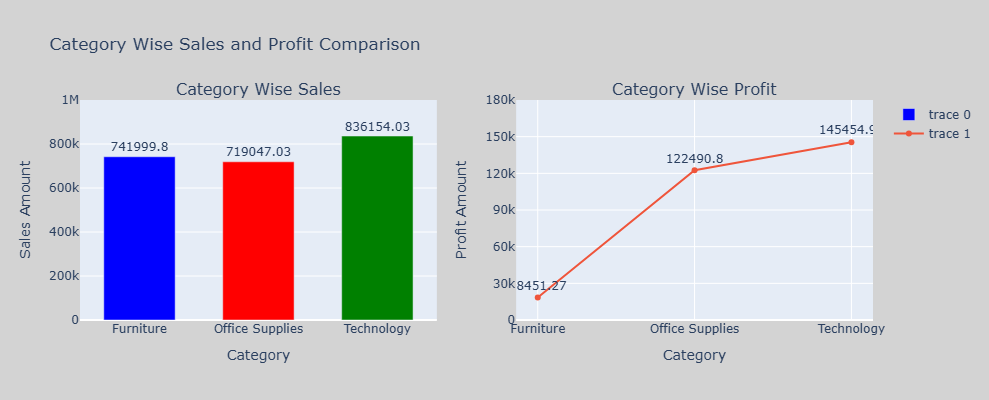

In [8]:
# Category Wise Sales and Profit Comparison

cat=df.groupby('Category')[['Sales','Profit']].sum().reset_index().round(2)
fig=make_subplots(rows=1,cols=2,subplot_titles=('Category Wise Sales','Category Wise Profit'))

# First chart
fig.add_trace(go.Bar(x=cat['Category'],y=cat['Sales'],marker_color=['blue','red','green'],text=cat['Sales'],
                     textposition='outside',width=0.6), row=1,col=1)
# Second chart
fig.add_trace(go.Scatter(x=cat['Category'],y=cat['Profit'],text=cat['Profit'],mode='lines+markers+text',
                         textposition='top center'),row=1,col=2)

# X-axis for title set
fig.update_xaxes(title_text='Category',row=1,col=1)
fig.update_xaxes(title_text='Category',row=1,col=2)

# Y-axis Range and Tick Step for Subplot Graph
fig.update_yaxes(title_text='Sales Amount',range=[0,1000000],tick0=0,dtick=200000,tickformat='~s',row=1,col=1)
fig.update_yaxes(title_text='Profit Amount',range=[0,180000],dtick=30000,tickformat='~s',row=1,col=2)

fig.update_layout(height=400,width=1000,paper_bgcolor='lightgray',title_text='Category Wise Sales and Profit Comparison')
fig.show()

In [18]:
# Most used colors:

# "white"   "black"   "lightgray"      "gray"
# "whitesmoke"       "lavender"        "lightblue"
# "lightyellow"     "#f8f9fa"        "#e9ecef"
# "#f0f0f0"        "#000000"        "#ffffff"

In [ ]:
# Common plot_bgcolor colors
# Most used colors:

# "white"
# "lightgray"
# "rgba(0,0,0,0)" (transparent)
# "#f5f5f5"
# "#fafafa"
# "#f0f0f0"
# "#1f1f1f"
# "#2c2c2c"
# "#e5e5e5"
# "aliceblue"

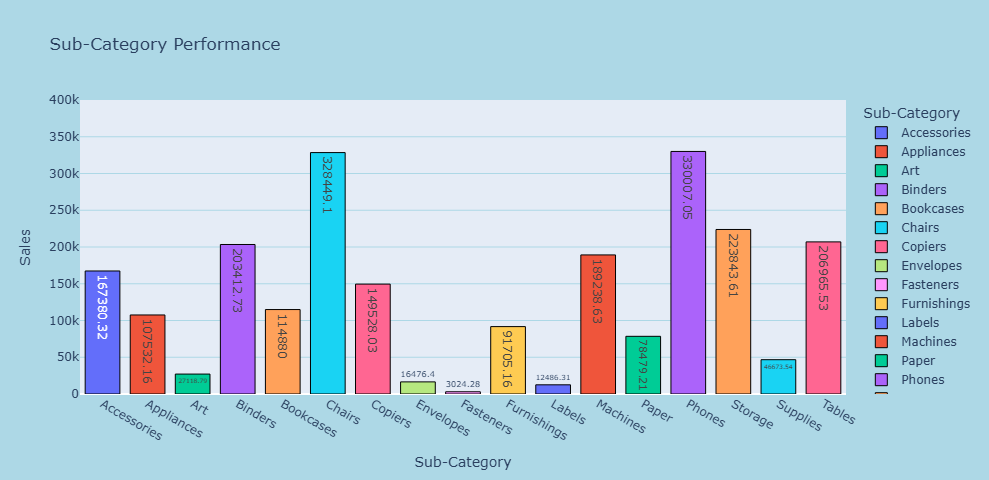

In [53]:
# 5. Sub-Category Performance
sub=df.groupby('Sub-Category')['Sales'].sum().reset_index().round(2)
fig=px.bar(sub,x='Sub-Category',y='Sales',color='Sub-Category',title='Sub-Category Performance',text='Sales')
fig.update_layout(height=480,width=970,paper_bgcolor="lightblue",yaxis=dict(gridcolor='lightblue',gridwidth=1))
fig.update_traces(width=0.77,marker_line_color='black',marker_line_width=1)
fig.update_yaxes(range=[0,400000],dtick=50000)
fig.show()